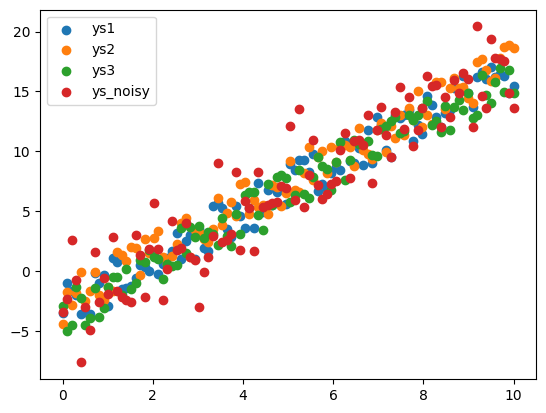

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score
import pytest

# Создание датасетов
np.random.seed(42)  # для воспроизводимости результатов

# Генерация данных
xs = np.linspace(0, 10, 100)
ys1 = 2.0 * xs + np.random.random(100) * 4 - 5
ys2 = 2.0 * xs + np.random.random(100) * 4 - 4.5
ys3 = 2.0 * xs + np.random.random(100) * 4 - 5.5
ys_noisy = ys1 + np.random.normal(loc=0, scale=2, size=len(xs))

# Визуализация данных
plt.scatter(xs, ys1, label='ys1')
plt.scatter(xs, ys2, label='ys2')
plt.scatter(xs, ys3, label='ys3')
plt.scatter(xs, ys_noisy, label='ys_noisy')
plt.legend()
plt.show()

Mean squared error: 1.40
Coefficient of determination: 0.96
Coefficients:  [2.00819693]


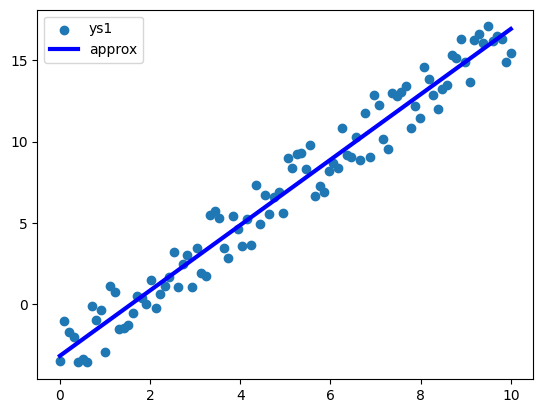

In [11]:
# Обучение модели на ys1
reg = LinearRegression()
reg.fit(xs.reshape(-1, 1), ys1)
approx = reg.predict(xs.reshape(-1, 1))

# Оценка качества модели
print('Mean squared error: %.2f' % mse(ys1, approx))
print('Coefficient of determination: %.2f' % r2_score(ys1, approx))
print('Coefficients: ', reg.coef_)

# Визуализация результатов
plt.scatter(xs, ys1, label='ys1')
plt.plot(xs, approx, color='blue', linewidth=3, label='approx')
plt.legend()
plt.show()


In [12]:
# Сохранение датасетов и предсказаний
np.savetxt('datasets/ys1.csv', ys1, delimiter=',')
np.savetxt('datasets/ys2.csv', ys2, delimiter=',')
np.savetxt('datasets/ys3.csv', ys3, delimiter=',')
np.savetxt('datasets/ys_noisy.csv', ys_noisy, delimiter=',')
np.savetxt('datasets/approx.csv', approx, delimiter=',')

In [13]:
# Тестирование модели с использованием pytest
%%writefile test.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse, r2_score

@pytest.fixture()
def load_ys(request):
    file_name = request.param
    ys = np.loadtxt(file_name, delimiter=',')
    return ys

@pytest.fixture()
def load_approx():
    approx = np.loadtxt('datasets/approx.csv', delimiter=',')
    return approx

@pytest.mark.parametrize('load_ys', ['datasets/ys1.csv', 'datasets/ys2.csv', 'datasets/ys3.csv', 'datasets/ys_noisy.csv'], indirect=True)
def test_mse(load_ys, load_approx):
    assert mse(load_ys, load_approx) < 10, f"MSE слишком велико: {mse(load_ys, load_approx)}"

@pytest.mark.parametrize('load_ys', ['datasets/ys1.csv', 'datasets/ys2.csv', 'datasets/ys3.csv', 'datasets/ys_noisy.csv'], indirect=True)
def test_r2(load_ys, load_approx):
    assert r2_score(load_ys, load_approx) > 0.5, f"R2 score слишком низкий: {r2_score(load_ys, load_approx)}"


Writing test.py


======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 8 items                                                                                  

test_score.py::test_mse[datasets/ys1.csv] PASSED                                             [ 12%]
test_score.py::test_mse[datasets/ys2.csv] PASSED                                             [ 25%]
test_score.py::test_mse[datasets/ys3.csv] PASSED                                             [ 37%]
test_score.py::test_mse[datasets/ys_noisy.csv] PASSED                                        [ 50%]
test_score.py::test_r2[datasets/ys1.csv] PASSED                                              [ 62%]
test_score.py::test_r2[datasets/ys2.csv] PASSED                                              [ 75%]
test_score.py::test_r2[datasets/ys3.csv] PASSED       

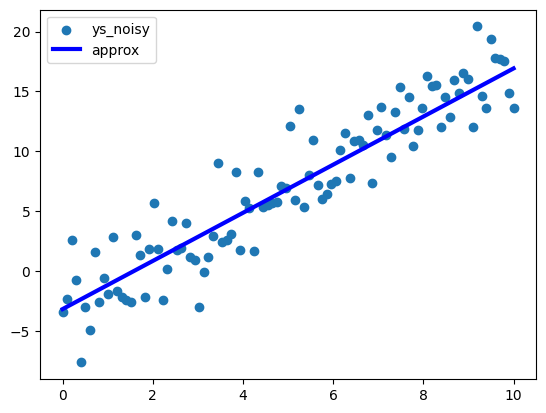

In [14]:
!pytest -v test_score.py

# Анализ качества модели на датасете с шумом
print('Mean squared error on noisy data: %.2f' % mse(ys_noisy, approx))
print('Coefficient of determination on noisy data: %.2f' % r2_score(ys_noisy, approx))

plt.scatter(xs, ys_noisy, label='ys_noisy')
plt.plot(xs, approx, color='blue', linewidth=3, label='approx')
plt.legend()
plt.show()
